<a href="https://colab.research.google.com/github/lulezo/Parkinson-s-Disease-Telemonitoring-Dataset-Regression-Model/blob/main/PD_dataset_Pycaret_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. pycaret Installation

In [ ]:
pip install pycaret

In [2]:
import pycaret
pycaret.__version__

'3.2.0'

2. Loading the dataset

In [3]:
!wget https://archive.ics.uci.edu/static/public/189/data.csv

--2023-11-29 15:05:28--  https://archive.ics.uci.edu/static/public/189/data.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.csv’

data.csv                [ <=>                ] 885.62K  --.-KB/s    in 0.05s   

2023-11-29 15:05:28 (16.6 MB/s) - ‘data.csv’ saved [906870]



In [4]:
import pandas as pd
df = pd.read_csv('data.csv')
df = df.drop('motor_UPDRS', axis=1)
df = df.drop('subject#', axis=1)
df.head()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS
0,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,34.398
1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,34.894
2,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,35.389
3,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,35.810
4,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,36.375


In [5]:
df.shape

(5875, 20)

3. Setup

In [28]:
from pycaret.regression import *
#s = setup(df, target = 'total_UPDRS', session_id=123, normalize=True, fold=25, normalize_method='minmax', remove_multicollinearity=True, multicollinearity_threshold=0.3)
s = setup(df, target = 'total_UPDRS', session_id=123, fold=25, remove_multicollinearity=True, multicollinearity_threshold=0.3)

,Description,Value
0,Session id,123
1,Target,total_UPDRS
2,Target type,Regression
3,Original data shape,"(5875, 20)"
4,Transformed data shape,"(5875, 6)"
5,Transformed train set shape,"(4112, 6)"
6,Transformed test set shape,"(1763, 6)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


In [29]:
# Access X_train_transformed
get_config('X_train_transformed')

,age,sex,test_time,HNR,PPE
2837,73.0,0.0,88.788002,21.292000,0.23968
1138,73.0,1.0,120.550003,22.187000,0.15161
2017,65.0,0.0,54.469002,25.204000,0.14879
684,75.0,0.0,91.397003,20.502001,0.18814
3783,74.0,1.0,6.366000,18.750000,0.20523
...,...,...,...,...,...
5218,67.0,0.0,133.770004,21.254000,0.25536
4060,49.0,0.0,11.394000,24.089001,0.16133
1346,68.0,0.0,168.350006,21.507000,0.29972
3454,76.0,0.0,3.395800,19.867001,0.22049


4. Compare Models

In [30]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.8438,4.9388,2.1873,0.9547,0.1084,0.0456,0.9424
et,Extra Trees Regressor,0.9026,5.0771,2.2271,0.9535,0.1104,0.0483,0.5084
xgboost,Extreme Gradient Boosting,1.2370,5.1197,2.2354,0.9532,0.1027,0.0575,0.2144
lightgbm,Light Gradient Boosting Machine,1.5606,6.5409,2.5402,0.9404,0.1203,0.0742,0.2620
dt,Decision Tree Regressor,0.7131,7.6262,2.7003,0.9306,0.1347,0.0398,0.0448
gbr,Gradient Boosting Regressor,3.9519,24.8063,4.9765,0.7758,0.2015,0.1704,0.3996
knn,K Neighbors Regressor,5.9654,63.1011,7.9310,0.4343,0.2941,0.2493,0.0696
ada,AdaBoost Regressor,7.2312,69.0342,8.3046,0.3790,0.3222,0.3174,0.3248
br,Bayesian Ridge,8.2792,99.2533,9.9491,0.1135,0.3739,0.3660,0.0368
ridge,Ridge Regression,8.2844,99.2784,9.9504,0.1132,0.3739,0.3662,0.0388


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [9]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,0.7131,7.6262,2.7003,0.9306,0.1347,0.0398,0.0484
rf,Random Forest Regressor,0.8438,4.9384,2.1873,0.9547,0.1084,0.0456,0.9836
et,Extra Trees Regressor,0.9017,5.0693,2.2253,0.9536,0.1103,0.0482,0.4188
xgboost,Extreme Gradient Boosting,1.2370,5.1197,2.2354,0.9532,0.1027,0.0575,0.1540
lightgbm,Light Gradient Boosting Machine,1.5718,6.6379,2.5585,0.9396,0.1211,0.0747,0.4520
gbr,Gradient Boosting Regressor,3.9518,24.8059,4.9764,0.7758,0.2015,0.1704,0.4588
knn,K Neighbors Regressor,4.9704,55.8842,7.4500,0.4974,0.2809,0.2112,0.0484
ada,AdaBoost Regressor,7.2118,68.7176,8.2853,0.3822,0.3218,0.3168,0.3104
huber,Huber Regressor,8.2146,99.8564,9.9776,0.1090,0.3717,0.3575,0.0612
br,Bayesian Ridge,8.2846,99.2795,9.9505,0.1132,0.3740,0.3664,0.0720


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Decision Tree Model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7136,7.1388,2.6718,0.9406,0.1342,0.0382
1,0.4499,3.7548,1.9377,0.9625,0.1174,0.0301
2,0.7464,6.7323,2.5947,0.9371,0.1298,0.0383
3,0.8236,7.5250,2.7432,0.9241,0.1447,0.0564
4,0.6180,6.4898,2.5475,0.9334,0.1126,0.0225
5,0.6327,7.4607,2.7314,0.9280,0.1290,0.0282
6,0.6554,6.5607,2.5614,0.9375,0.1404,0.0378
7,0.9868,11.7390,3.4262,0.8959,0.1731,0.0638
8,0.6123,5.8390,2.4164,0.9449,0.1193,0.0280


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

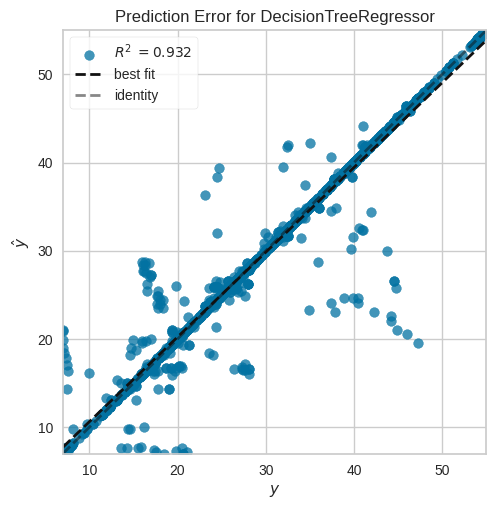

In [31]:
dt = create_model('dt')
plot_model(dt, plot = 'error')

5. Analyze Model

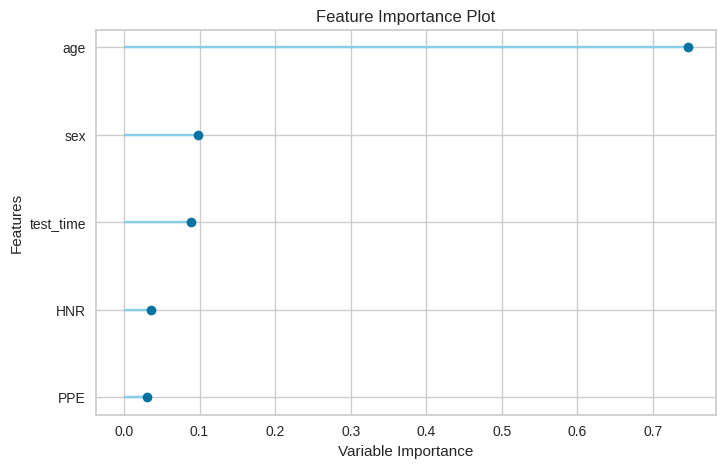

In [32]:
# plot feature importance
plot_model(dt, plot = 'feature')

In [33]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

7. Tune Model

In [13]:
# predict on test set
holdout_pred = predict_model(dt)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,0.7201,8.0174,2.8315,0.9316,0.1318,0.0352


In [14]:
holdout_pred.head()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS,prediction_label
2661,55,0,117.779999,0.00506,0.000034,0.00164,0.00223,0.00493,0.01881,0.188,...,0.01064,0.01410,0.02659,0.011061,25.356001,0.44055,0.67158,0.18952,26.663000,25.667999
1172,73,1,183.699997,0.00259,0.000011,0.00111,0.00104,0.00333,0.01376,0.129,...,0.00718,0.01277,0.01664,0.007869,26.225000,0.40624,0.60236,0.12222,29.031000,29.031000
1877,58,1,175.389999,0.00358,0.000020,0.00161,0.00168,0.00482,0.02201,0.201,...,0.01337,0.01787,0.03365,0.010896,22.733999,0.42592,0.57892,0.14130,25.417999,25.417999
547,74,0,142.699997,0.00484,0.000039,0.00207,0.00218,0.00622,0.03640,0.373,...,0.01909,0.02824,0.05911,0.017947,21.205000,0.62605,0.60507,0.14467,27.139000,27.139000
5068,56,1,105.790001,0.00545,0.000028,0.00320,0.00296,0.00961,0.02196,0.192,...,0.01341,0.01518,0.03755,0.015528,21.239000,0.36154,0.61082,0.11911,43.201000,43.201000


In [35]:
prediction = dt.predict([[55, 0, 117, 25, 0.18]])
prediction.item()

25.667999267578125

8. Save Model

In [36]:
# save pipeline
save_model(dt, 'dt_pred')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'sex', 'test_time',
                                              'Jitter(%)', 'Jitter(Abs)',
                                              'Jitter:RAP', 'Jitter:PPQ5',
                                              'Jitter:DDP', 'Shimmer',
                                              'Shimmer(dB)', 'Shimmer:APQ3',
                                              'Shimmer:APQ5', 'Shimmer:APQ11',
                                              'Shimmer:DDA', 'NHR', 'HNR',
                                              'RPDE', 'DFA', 'PPE'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('remove_multicollinearity',
                  TransformerWra

9. Ensemble Model

In [37]:
# ensemble with boosting
dt_ensemble_boosting = ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6060,4.5231,2.1267,0.9624,0.1085,0.0349
1,0.6276,6.0087,2.4513,0.9399,0.1230,0.0341
2,0.6628,4.7432,2.1779,0.9557,0.0906,0.0315
3,1.2004,10.8824,3.2989,0.8902,0.1572,0.0669
4,0.5753,8.1031,2.8466,0.9168,0.1101,0.0179
5,0.5669,6.4742,2.5444,0.9375,0.1206,0.0237
6,0.5646,4.7501,2.1795,0.9547,0.1070,0.0321
7,0.7355,6.7686,2.6017,0.9400,0.1532,0.0502
8,0.8490,10.9128,3.3035,0.8971,0.1701,0.0573


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [38]:
# predict on test set
holdout_pred = predict_model(dt_ensemble_boosting)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,0.6624,6.6841,2.5854,0.9430,0.1161,0.0296


In [39]:
holdout_pred.head()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS,prediction_label
2661,55,0,117.779999,0.00506,0.000034,0.00164,0.00223,0.00493,0.01881,0.188,...,0.01064,0.01410,0.02659,0.011061,25.356001,0.44055,0.67158,0.18952,26.663000,25.032000
1172,73,1,183.699997,0.00259,0.000011,0.00111,0.00104,0.00333,0.01376,0.129,...,0.00718,0.01277,0.01664,0.007869,26.225000,0.40624,0.60236,0.12222,29.031000,29.031000
1877,58,1,175.389999,0.00358,0.000020,0.00161,0.00168,0.00482,0.02201,0.201,...,0.01337,0.01787,0.03365,0.010896,22.733999,0.42592,0.57892,0.14130,25.417999,25.417999
547,74,0,142.699997,0.00484,0.000039,0.00207,0.00218,0.00622,0.03640,0.373,...,0.01909,0.02824,0.05911,0.017947,21.205000,0.62605,0.60507,0.14467,27.139000,27.139000
5068,56,1,105.790001,0.00545,0.000028,0.00320,0.00296,0.00961,0.02196,0.192,...,0.01341,0.01518,0.03755,0.015528,21.239000,0.36154,0.61082,0.11911,43.201000,43.201000


In [40]:
# top 3 models based on mae
best_mae_models_top3

[DecisionTreeRegressor(random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123),
 ExtraTreesRegressor(n_jobs=-1, random_state=123)]

10. Blend Models

In [41]:
# blend top 3 models
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7483,3.8025,1.9500,0.9684,0.0930,0.0387
1,0.6024,2.7621,1.6619,0.9724,0.1004,0.0358
2,0.7427,3.6247,1.9039,0.9661,0.0945,0.0376
3,1.0352,6.1139,2.4726,0.9383,0.1325,0.0672
4,0.7229,6.6939,2.5873,0.9313,0.0944,0.0261
5,0.7020,4.6827,2.1640,0.9548,0.0967,0.0326
6,0.7546,4.3340,2.0818,0.9587,0.1101,0.0425
7,1.0390,8.6013,2.9328,0.9237,0.1517,0.0629
8,0.7874,4.5714,2.1381,0.9569,0.1057,0.0440


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingRegressor(estimators=[('Decision Tree Regressor',
                             DecisionTreeRegressor(random_state=123)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=123)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=123))],
                n_jobs=-1)

11. Stack Model

In [ ]:
# stack models
stack_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7786,3.0847,1.7563,0.9743,0.0825,0.0393
1,0.7307,3.2952,1.8153,0.9671,0.1025,0.0404
2,0.7870,3.1211,1.7667,0.9708,0.0872,0.0391
3,1.2200,6.7485,2.5978,0.9319,0.1386,0.0755
4,0.7965,8.0136,2.8308,0.9177,0.0991,0.0285
5,0.7892,4.0309,2.0077,0.9611,0.0917,0.0371
6,0.8541,4.0464,2.0116,0.9614,0.1039,0.0467
7,1.1220,7.9795,2.8248,0.9292,0.1451,0.0642
8,0.8993,6.2568,2.5014,0.9410,0.1211,0.0527


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingRegressor(cv=5,
                  estimators=[('Decision Tree Regressor',
                               DecisionTreeRegressor(random_state=123)),
                              ('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=123)),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

13. Deploy Model

In [ ]:
!pip install pyngrok

In [ ]:
#streamlit ==> to define component of application
! pip install streamlit

In [ ]:
!pip install writefile

In [53]:
%%writefile app.py
######### creating python script #########

import streamlit as st
import pickle
import numpy

# loading the trained model
path_model = '/content/finalized_model.sav'
pickle_in = open(path_model,'rb')  # rb => read binary file
#predictor = pickle.load(pickle_in) # loading model in variable
predictor = pickle.load(open(path_model, 'rb'))


# Function to define out app
def main():
    #page header
    st.markdown('Total UPDRS Prediction Model')
    ###### 2. loading data ######

    ## creating boxes where user will provide information => we have 5 features in our data

    age = st.number_input('Age of the patient')     #numerical input box
    sex = st.selectbox('Gender',('male','female'))  # creates a dropdown box
    test_time = st.number_input('Time of test')     #numerical input box
    HNR = st.number_input('HNR of patient')         #numerical input box
    PPE = st.number_input('PPE of patient')         #numerical input box
    total_updrs = ''

    if sex == 'male':
      gender = 0
    else:
      gender = 1
    ## check => if clicked make a prediction and store it
    if st.button('Check'):
        total_updrs = predict(age, gender, test_time, HNR, PPE) # calling 'prediction' function
        st.success(f'Patient Total UPDRS is: {total_updrs}') #display to frontend


# defining 'prediction' function => it will predict based on user input data
def predict(age, gender, test_time, HNR, PPE):
    y_pred = predictor.predict([[age, gender, test_time, HNR, PPE]]).item()
    return y_pred

if __name__ == '__main__':
    main()

Overwriting app.py


In [54]:
import pickle

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(dt, open(filename, 'wb'))

#path_model = '/content/dt_pred.pkl'
#pickle_in = open(path_model,'rb')  # rb => read binary file
#predictor = pickle.load(pickle_in) # loading model in variable

# load the model from disk
predictor = pickle.load(open(filename, 'rb'))
result = predictor.predict([[55, 0, 117, 0.18, 25]]).item()
print(result)

26.309999465942383


In [55]:
!ls

app.py	data.csv  dt_pred.pkl  finalized_model.sav  logs.log  sample_data


In [57]:
# running app
!streamlit run app.py & npx localtunnel --port 8501

[##................] / fetchMetadata: sill resolveWithNewModule ms@2.1.2 checki


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.101.228:8501

npx: installed 22 in 1.732s
your url is: https://proud-dogs-peel.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
  Stopping...
^C


In [60]:
#To get the IP address of your machine -Needed to access the deployed model- , please run this command
!wget -q -O - ipv4.icanhazip.com

34.125.101.228
